In [1]:
import torch as t
import matplotlib.pyplot as plt

In [3]:
n_data = t.ones(100,2)
x0 = t.normal(2*n_data,1)
y0 = t.zeros(100)
x1 = t.normal(-2*n_data,1)
y1 = t.ones(100)
x0,y0,x1,y1

(tensor([[ 2.5436,  2.3300],
         [ 0.7811,  1.4566],
         [-0.4194,  1.1966],
         [ 2.8954,  3.2313],
         [-0.5871,  2.6881],
         [ 2.3062,  2.7404],
         [ 0.9730,  0.8921],
         [ 1.7869,  1.0263],
         [ 1.5824,  1.7458],
         [ 1.4075,  3.0559],
         [ 2.6231,  2.8242],
         [ 1.6686,  1.8589],
         [ 4.4080,  2.3404],
         [ 2.1360,  2.9610],
         [ 2.0227,  1.1851],
         [ 2.6394,  2.5781],
         [ 0.9206,  1.8015],
         [ 0.7231,  4.9605],
         [ 2.9428,  1.0197],
         [ 1.0422,  0.7971],
         [ 2.5841,  1.7906],
         [ 2.1132,  2.7947],
         [ 4.4597,  1.8520],
         [ 1.5271,  4.4154],
         [ 1.1443,  1.1349],
         [ 2.0930,  0.9002],
         [-1.1071,  1.3014],
         [ 1.0688,  3.8215],
         [ 2.1208,  2.3763],
         [ 2.3195,  1.5473],
         [ 1.8191,  2.4809],
         [ 1.1236, -0.3776],
         [ 3.7676,  1.4175],
         [ 0.8242,  2.8501],
         [ 2.9

In [12]:
x = t.cat((x0, x1), 0).type(t.FloatTensor)  # FloatTensor = 32-bit floating
y = t.cat((y0, y1),).type(t.LongTensor)  # LongTensor = 64-bit integer
x.size(),y.size()

(torch.Size([200, 2]), torch.Size([200]))

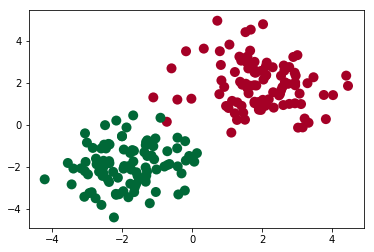

In [13]:
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [14]:
import torch.nn.functional as F

In [15]:
class Net(t.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = t.nn.Linear(n_feature,n_hidden)
        self.out = t.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [28]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
net
net2 = t.nn.Sequential(
    t.nn.Linear(2, 10),
    t.nn.ReLU(),
    t.nn.Linear(10, 2)
)

D:\Program Files\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


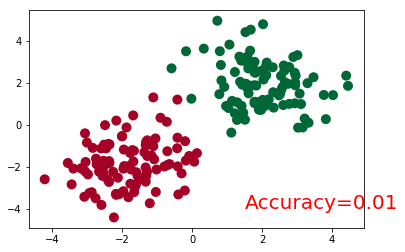

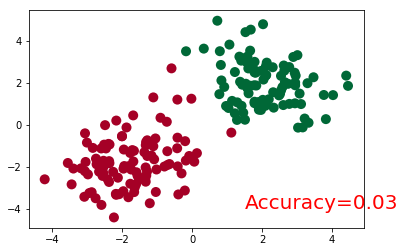

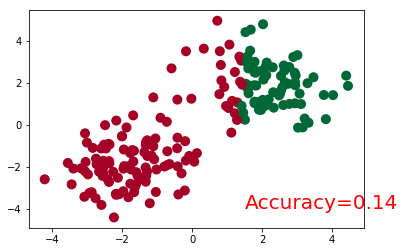

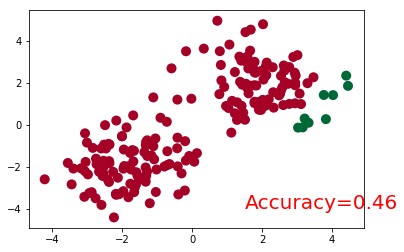

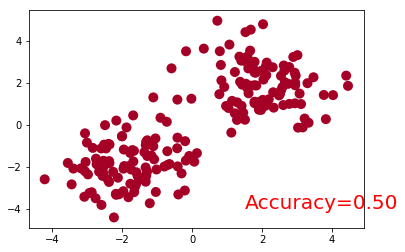

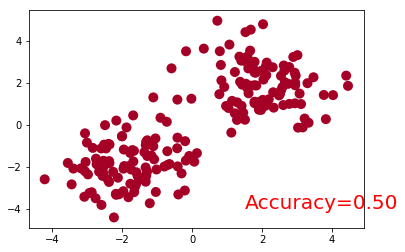

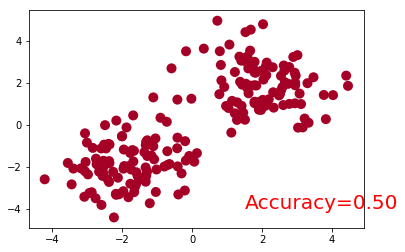

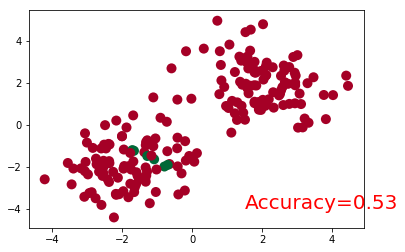

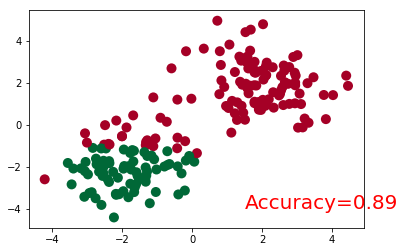

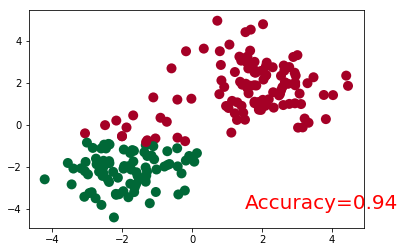

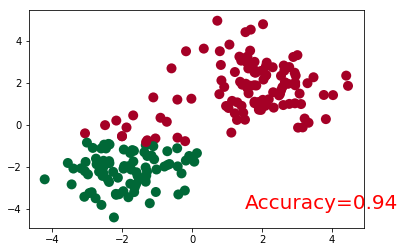

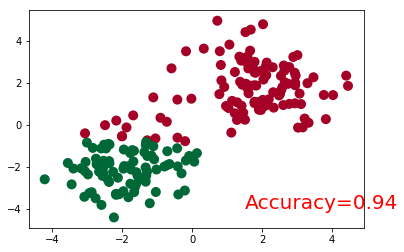

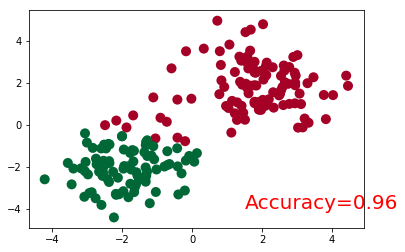

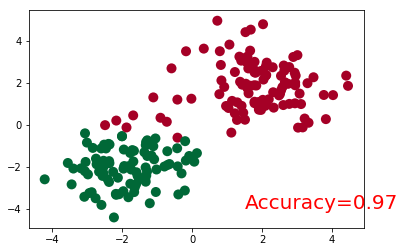

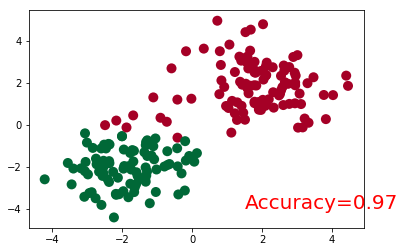

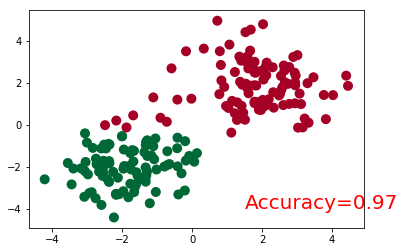

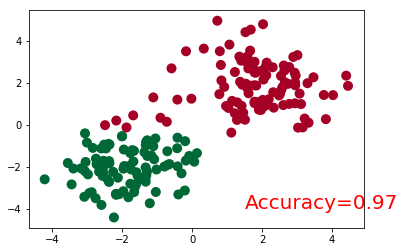

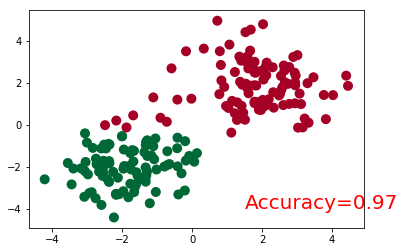

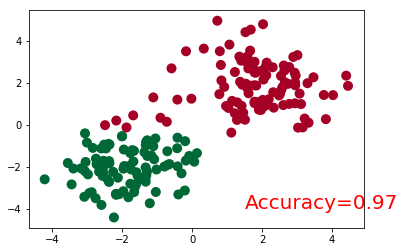

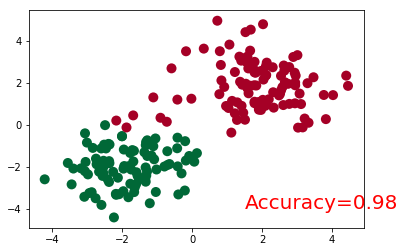

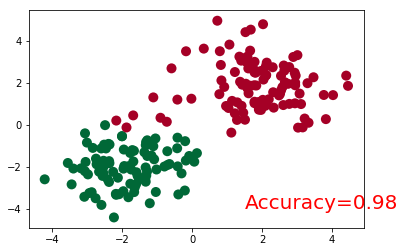

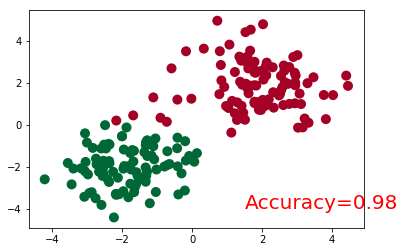

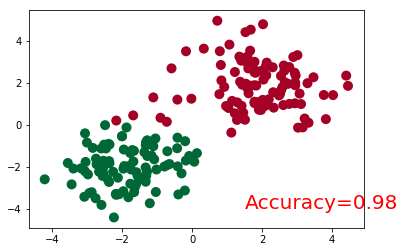

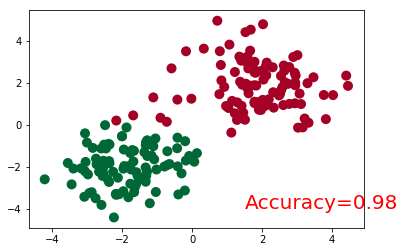

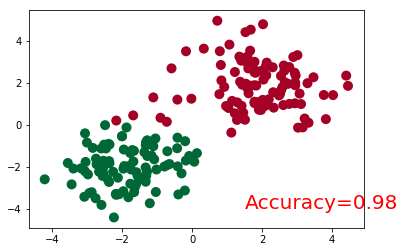

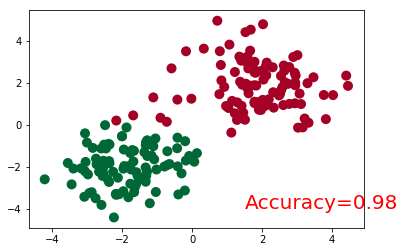

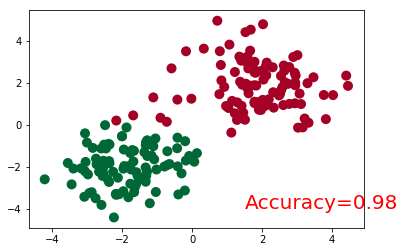

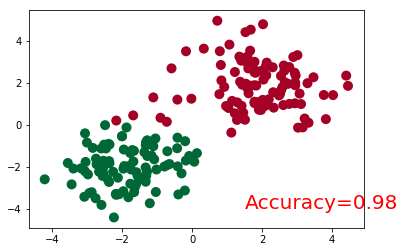

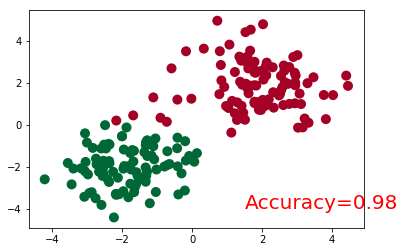

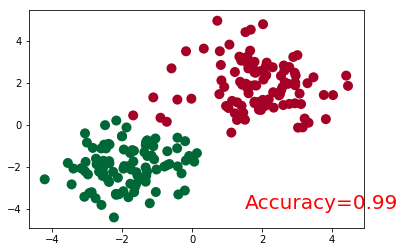

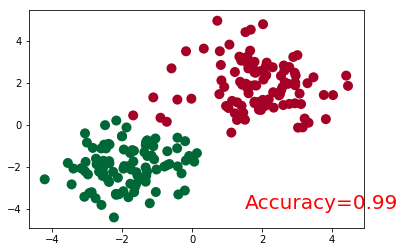

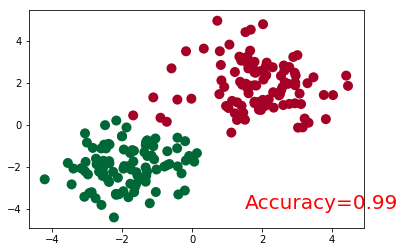

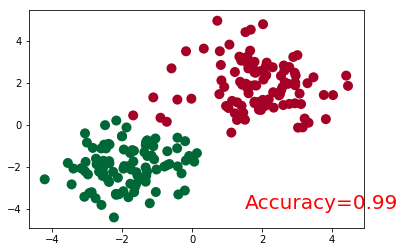

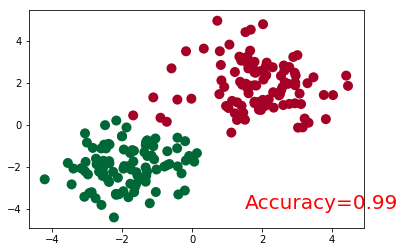

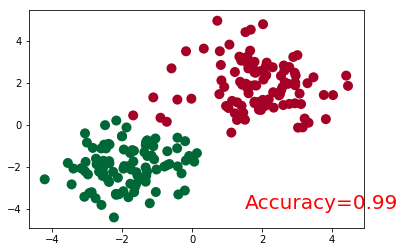

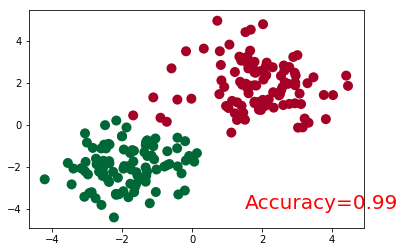

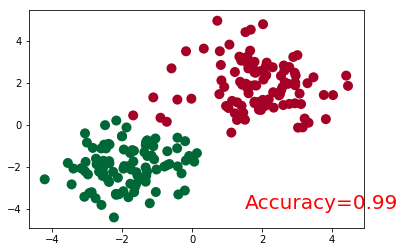

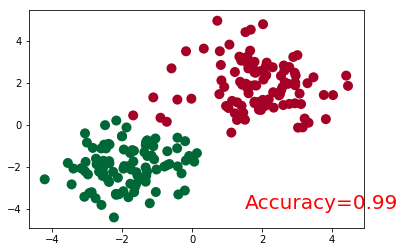

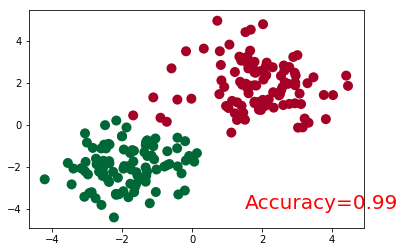

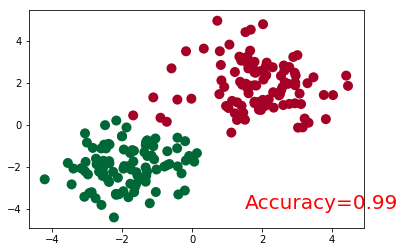

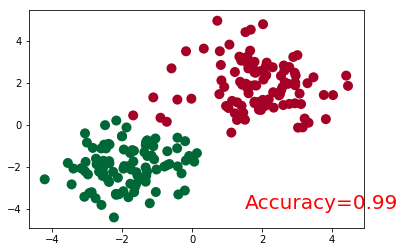

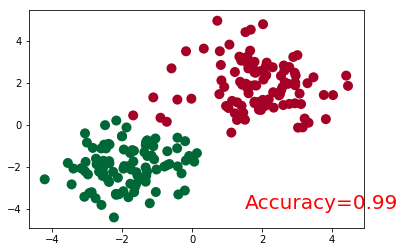

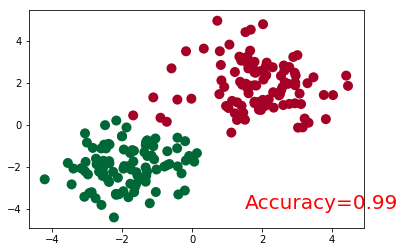

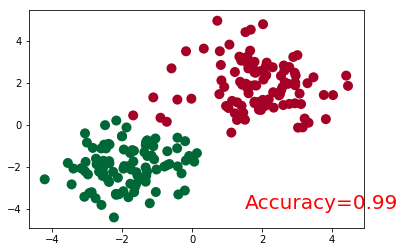

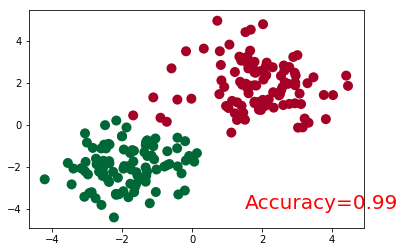

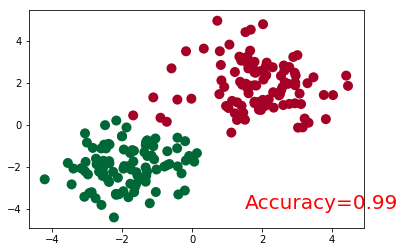

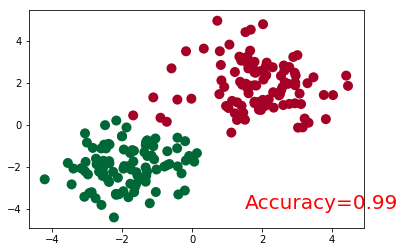

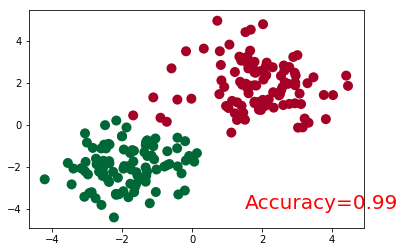

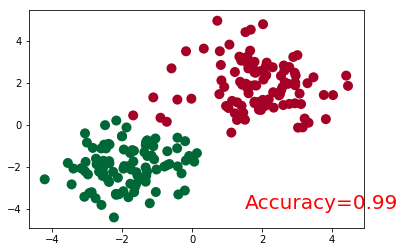

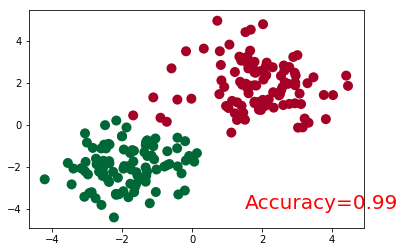

In [30]:
optimizer = t.optim.SGD(net.parameters(),lr = 0.02)
loss_func = t.nn.CrossEntropyLoss()
plt.ion()   # 画图
plt.show()
for i in range(100):
    out = net(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = t.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

In [24]:
net2 = t.nn.Sequential(
    t.nn.Linear(1, 10),
    t.nn.ReLU(),
    t.nn.Linear(10, 1)
)
net2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
test = [-1.7402, -2.1390]
prey = net(x)
prey

tensor([[ 2.5323, -1.9024],
        [ 1.2760, -1.1067],
        [ 0.6072, -0.7186],
        [ 3.1894, -2.3927],
        [ 1.3736, -1.3282],
        [ 2.6577, -2.0388],
        [ 1.0790, -0.7012],
        [ 1.5322, -0.8577],
        [ 1.7926, -1.3879],
        [ 2.4455, -1.9626],
        [ 2.8422, -2.1507],
        [ 1.8896, -1.4794],
        [ 3.4740, -1.9917],
        [ 2.7080, -2.0945],
        [ 1.7287, -0.9898],
        [ 2.7109, -2.0474],
        [ 1.5286, -1.3006],
        [ 3.2203, -2.6293],
        [ 2.0809, -0.9180],
        [ 1.0630, -0.6360],
        [ 2.2922, -1.4900],
        [ 2.6046, -2.0166],
        [ 3.2453, -1.6264],
        [ 3.2622, -2.5831],
        [ 1.2811, -0.8964],
        [ 1.6118, -0.7806],
        [ 0.3706, -0.5983],
        [ 2.7294, -2.2155],
        [ 2.3724, -1.8362],
        [ 2.0463, -1.2873],
        [ 2.3005, -1.8101],
        [ 0.5149,  0.1597],
        [ 2.6851, -1.2623],
        [ 2.0767, -1.7343],
        [ 2.5788, -1.6784],
        [ 2.2133, -1